In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nettools.multiplex import MultiplexNetwork
from nettools.multiplex import MultiplexConstructor
from nettools.monoplex import NetworkGenerator, Network
from nettools.multiplex import Percolation, running_mean

# Percolation

I this notebook I will analyze reaserch publicated by *Buldyrev* about cascades in **interdependent networks**. For that purpose I created Percolation module for my **nettools** library, which is able to plot **GCC** size, when changing percolation probability.

In my reaserch I will test SF networks (*Barabassi Albert/ Barabassi Bianconi*) and Erods-Renyi network.
First I will use percolation module on **ER** and **SF** monoplex networks, next this same approach will be used for multiplex networks.

#### Erdos-Renyi, Barabassi Biaconi and Barabassi Albert monoplex networks

Percolation process on **ER** network, <br>Paramaters: *< k > = 2, N = 2000* <br>
Percolation process on **BA** network, <br>Paramaters: *< k > = 2m = 1, N = 2000* <br>
In **BB** network hubs not allwayes are the oldes nodes. In this model fitness parameter is introduced, by that 
each node have different dynamic in time. 
$$\gamma = 2.25$$

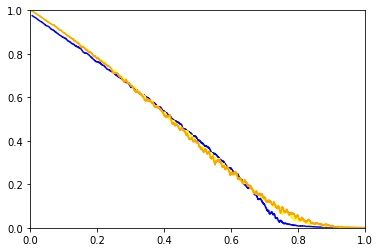

In [3]:
nodes_nm = 3000
ng = NetworkGenerator(nodes=nodes_nm)
mc = MultiplexConstructor()
er1 = ng.er_network(p=4.0 / float(nodes_nm - 1))
ba1 = ng.ba_network(m0=2)
bb1 = ng.bb_network(m0=2)
mnet_er = mc.construct(er1)
mnet_ba = mc.construct(ba1)
mnet_bb = mc.construct(bb1)
per_er = Percolation(mnet_er)
per_ba = Percolation(mnet_ba)
per_bb = Percolation(mnet_bb)
res_er = per_er.run(visualize=True, npoints=3000, colour='blue')
res_ba = per_ba.run(visualize=True, npoints=3000, colour='yellow')
res_bb = per_bb.run(visualize=True, npoints=3000, colour='orange')
plt.show()

From first and second plot we can see that percolation threshold for **random** network is something around: 
$$p_c = 1 - \frac{1}{<k>}$$
For Scale-Free networks threshold is a lot of higher, 100 % robusstness for $$N -> \infty$$ 
For real network little lower.

Here same comparision as before and additional plots for **ER-ER**, **BA-BA** and **BB-BB**

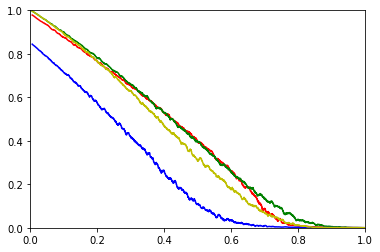

In [14]:
nodes_nm = 3000
# Define network generator
ng = NetworkGenerator(nodes=nodes_nm)
# Create networks
ba1 = ng.ba_network(m0=2)
ba_c_1 = ng.ba_network(m0=2)
ba_c_2 = ng.ba_network(m0=2)
er1 = ng.er_network(p=4.0 / float(nodes_nm - 1))
er_c_1 = ng.er_network(p=4.0 / float(nodes_nm - 1))
er_c_2 = ng.er_network(p=4.0 / float(nodes_nm - 1))
# Construct multilayer networks
mc = MultiplexConstructor()
mnet_er = mc.construct(er1)
mnet_ba = mc.construct(ba1)
mnet_erer = mc.construct(er_c_1, er_c_2)
mnet_baba = mc.construct(ba_c_1, ba_c_2)
# Initialize Percolation
per_er = Percolation(mnet_er)
per_ba = Percolation(mnet_ba)
per_erer = Percolation(mnet_erer)
per_baba = Percolation(mnet_baba)
per_er.run(visualize=True, npoints=3000, log=False, colour='r')
per_ba.run(visualize=True, npoints=3000, log=False, colour='g')
per_erer.run(visualize=True, npoints=3000, log=False, colour='b')
per_baba.run(visualize=True, npoints=3000, log=False, colour='y')
plt.show()

On the end comparision of network robustness, for graph where nodes between two layers are correlated and graph, where nodes are not correlated.

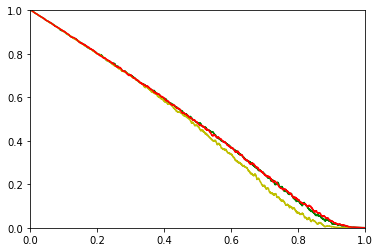

In [15]:
nodes_nm = 3000
# Define network generator
ng = NetworkGenerator(nodes=nodes_nm)
# Create networks
bb1 = ng.bb_network(m0=4)
bb_c_1 = ng.bb_network(m0=4)
bb_c_2 = ng.bb_network(m0=4)
bb_co_1 = ng.bb_network(m0=4)
bb_co_2 = ng.bb_network(m0=4)
# Construct multilayer networks
mc = MultiplexConstructor()
bac = mc.rewire_hubs(bb_co_1, rsteps=2000)
mnet_bb = mc.construct(bb1)
mnet_bbbb = mc.construct(bb_c_1, bb_c_2)
mnet_bbbb_co = mc.construct(bac, bb_co_1)
# Initialize Percolation
per_bb = Percolation(mnet_bb)
per_bbbb = Percolation(mnet_bbbb)
per_bbbb_co = Percolation(mnet_bbbb_co)
per_bb.run(visualize=True, npoints=3000, log=False, colour='g')
per_bbbb.run(visualize=True, npoints=3000, log=False, colour='y')
per_bbbb_co.run(visualize=True, npoints=3000, log=False, colour='r')
plt.show()